<a href="https://colab.research.google.com/github/Maedeabm/Stroke-Prediction-Odyssey-From-Classic-Classifiers-to-Transformers/blob/main/Stroke_Prediction_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A deep learning model using TensorFlow and Keras to predict stroke from

1. Data Loading:

To begin, load the data using the pandas library

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('stroke_dataset.csv')


2. Data Preprocessing:

Before feeding the data into a deep learning model, it needs to be preprocessed:

In [4]:
# Handle missing values (you can use other techniques depending on the nature of your data)
data.dropna(inplace=True)

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is crucial for deep learning models to help them converge faster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Build the Deep Learning Model:

We'll use TensorFlow's Keras API to build a sequential model:

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


4. Model Training:

Once the model is built, it's time to train it using the training data:

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
393/393 [==============================] - 3s 3ms/step - loss: 0.2309 - accuracy: 0.9524 - val_loss: 0.1916 - val_accuracy: 0.9460
Epoch 2/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1656 - accuracy: 0.9603 - val_loss: 0.1761 - val_accuracy: 0.9460
Epoch 3/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1540 - accuracy: 0.9603 - val_loss: 0.1703 - val_accuracy: 0.9460
Epoch 4/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9603 - val_loss: 0.1702 - val_accuracy: 0.9460
Epoch 5/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1495 - accuracy: 0.9603 - val_loss: 0.1673 - val_accuracy: 0.9460
Epoch 6/50
393/393 [==============================] - 1s 4ms/step - loss: 0.1442 - accuracy: 0.9603 - val_loss: 0.1681 - val_accuracy: 0.9460
Epoch 7/50
393/393 [==============================] - 2s 6ms/step - loss: 0.1398 - accuracy: 0.9603 - val_loss: 0.1681 - val_accuracy: 0.9460
Epoch 

5. Model Evaluation:

After training, evaluate the model's performance:

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

31/31 [==============================] - 0s 6ms/step - loss: 0.1787 - accuracy: 0.9460
Loss: 0.17870570719242096
Accuracy: 0.9460285305976868


6. Visualization:

Visualize the model's training progress:

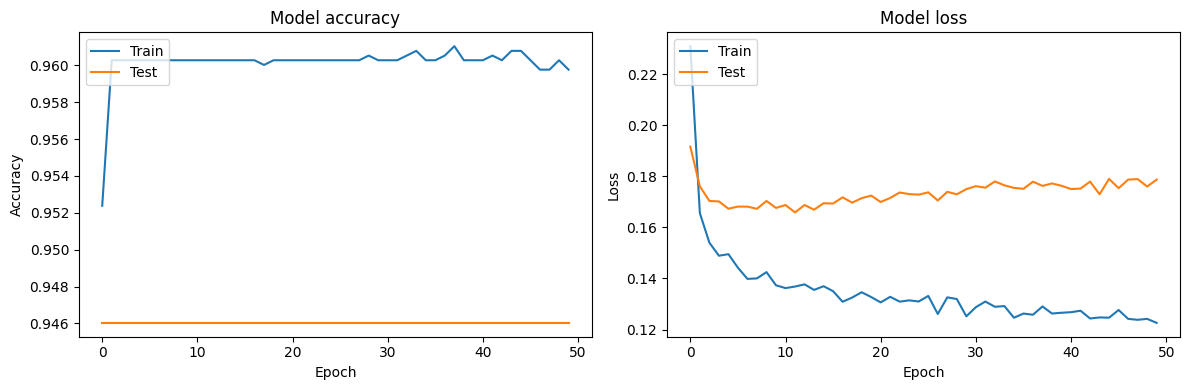

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



Explanations:

Sequential: This is a linear stack of neural network layers, and it's perfect for the type of feed-forward CNN we're building.

Dense: This is a standard layer type that is used in many cases for neural network layers. We can specify the number of neurons or nodes in the layer and the activation function.

Dropout: This is a regularization technique where randomly selected neurons are ignored during training. It helps to prevent overfitting.

binary_crossentropy: Since this is a binary classification problem, we use binary crossentropy as our loss function.

adam: This is a replacement optimization algorithm for stochastic gradient descent. It is known for combining the advantages of two other extensions of gradient descent.

The visualized metrics will provide insights into the model's performance over each epoch. Ideally, both the training and validation curves should converge to a point where they are as close as possible.

That's it! This deep learning model can predict strokes based on the dataset provided. Remember to fine-tune and optimize the model for better results. Adjusting parameters, layer sizes, and even adding more layers can help improve performance.

Complementary Model Evaluation

A good model evaluation will encompass various metrics to give a holistic understanding of the model's performance. For binary classification problems, we often look at the following metrics:

Confusion Matrix: Provides a matrix of True Positives, True Negatives, False Positives, and False Negatives.

Precision, Recall, and F1-score: These give a more detailed performance report beyond accuracy.

ROC curve and AUC: Helps in understanding the trade-off between the true positive rate and false positive rate.



1. Predicting on the Test Set:

First, let's get the predictions from our trained model:

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(y_test.shape)  # Convert probabilities to binary outputs

31/31 [==============================] - 0s 4ms/step


2. Confusion Matrix:

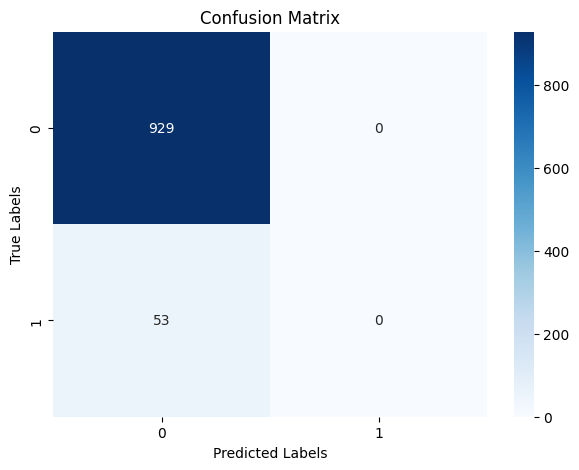

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


3. Precision, Recall, and F1-score:

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. ROC Curve and AUC:

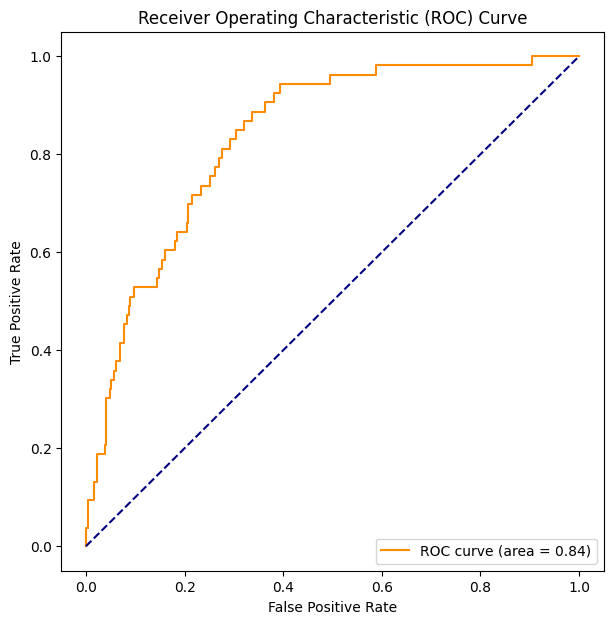

In [12]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix: This visual representation will show the actual vs. predicted classifications. A perfect classifier will have non-zero values only in the diagonal.

Precision: It tells us about the accuracy of positive predictions.

Recall (Sensitivity): It tells us about the fraction of the total amount of relevant instances that were actually retrieved.

F1-score: It's the harmonic mean of precision and recall and gives a balance between them.

ROC curve: This plot shows the true positive rate against the false positive rate for different threshold values. An ideal ROC curve will hug the top left corner of the plot.

AUC (Area Under the Curve): This metric calculates the entire two-dimensional area underneath the ROC curve. A model whose predictions are 100% correct will have an AUC of 1, and a model whose predictions are 100% wrong will score an AUC of 0.

In [ ]:
|